In [4]:
import pandas as pd

In [2]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/Users/damie/Downloads/sales_data.csv')

In [6]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [39]:
df.dropna(subset=['Product', 'Region'], inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 2 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     853 non-null    object 
 1   Region      853 non-null    object 
 2   Price       764 non-null    float64
 3   Units Sold  771 non-null    float64
 4   Sale Date   853 non-null    object 
dtypes: float64(2), object(3)
memory usage: 40.0+ KB


In [41]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,853,853,764.000000,771.000000,853
unique,50,10,NaN,NaN,810
top,Product_5,Region_9,NaN,NaN,2022-07-28
freq,28,101,NaN,NaN,2
mean,NaN,NaN,108.624987,10.090791,NaN
std,NaN,NaN,129.578293,3.236489,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.360000,8.000000,NaN
50%,NaN,NaN,78.410000,10.000000,NaN
75%,NaN,NaN,141.590000,12.000000,NaN


<Axes: xlabel='Product', ylabel='Price'>

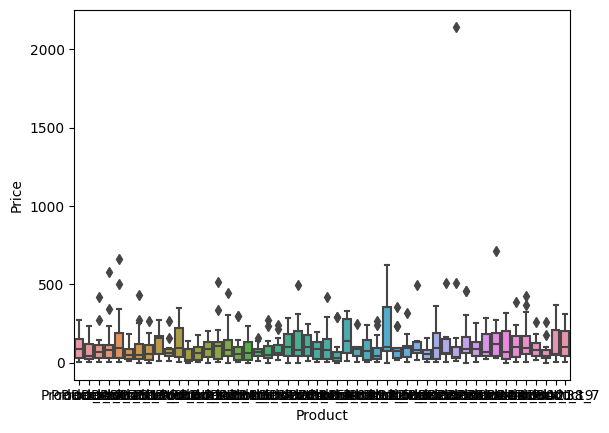

In [42]:
sns.boxplot(data = df, x = 'Product', y = 'Price')

In [49]:
df[df['Price'] >550]

,Product,Region,Price,Units Sold,Sale Date
437,Product_26,Region_8,585.17,13.0,2023-03-14
684,Product_45,Region_8,580.60,NaN,2023-11-16
728,Product_31,Region_3,665.00,9.0,2023-12-30
814,Product_26,Region_2,623.60,12.0,2024-03-25
853,Product_41,Region_1,713.29,10.0,2024-05-03
1014,Product_26,Region_8,585.17,13.0,2023-03-14


In [53]:
df.drop(437, axis=0, inplace=True)
df.drop(684, axis=0, inplace=True)
df.drop(728, axis=0, inplace=True)
df.drop(814, axis=0, inplace=True)
df.drop(853, axis=0, inplace=True)
df.drop(1014, axis=0, inplace=True)

In [55]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,846,846,757.000000,765.000000,846
unique,50,10,NaN,NaN,804
top,Product_5,Region_9,NaN,NaN,2022-07-28
freq,28,101,NaN,NaN,2
mean,NaN,NaN,101.840634,10.088889,NaN
std,NaN,NaN,96.356298,3.239553,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.210000,8.000000,NaN
50%,NaN,NaN,76.660000,10.000000,NaN
75%,NaN,NaN,139.330000,12.000000,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 2 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     846 non-null    object 
 1   Region      846 non-null    object 
 2   Price       757 non-null    float64
 3   Units Sold  765 non-null    float64
 4   Sale Date   846 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.7+ KB


In [57]:
df.groupby('Region')['Price'].mean()

Region
Region_1      93.083594
Region_10     99.094713
Region_2     121.259254
Region_3      90.138571
Region_4     103.655488
Region_5     103.248750
Region_6      85.844857
Region_7      93.277667
Region_8     116.872785
Region_9     106.962245
Name: Price, dtype: float64

In [58]:
df['Price']=df.groupby('Region')['Price'].fillna(df['Price'].mean())

In [61]:
df['Units Sold']=df.groupby('Region')['Units Sold'].fillna(df['Units Sold'].mean())

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 2 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     846 non-null    object 
 1   Region      846 non-null    object 
 2   Price       846 non-null    float64
 3   Units Sold  846 non-null    float64
 4   Sale Date   846 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.7+ KB


In [157]:
df_Top_Prod = df.groupby(['Product'])['Units Sold'].mean().sort_values(ascending=False).reset_index()

In [159]:
df_Top_Prod.head()

,Product,Units Sold
0,Product_50,11.484656
1,Product_14,11.448611
2,Product_3,11.250000
3,Product_41,11.235294
4,Product_10,11.181699


In [161]:
df_Top_Reg = df.groupby(['Region'])['Units Sold'].mean().sort_values(ascending=False).reset_index()

In [162]:
df_Top_Reg

,Region,Units Sold
0,Region_3,10.305026
1,Region_9,10.207701
2,Region_6,10.179404
3,Region_1,10.156773
4,Region_5,10.099875
5,Region_2,10.073364
6,Region_10,10.028842
7,Region_8,10.001788
8,Region_4,9.941520
9,Region_7,9.866013


In [163]:
df_Top_Reg_Price = df.groupby(['Region'])['Price'].mean().sort_values(ascending=False).reset_index()

In [164]:
df_Top_Reg_Price

,Region,Price
0,Region_2,119.663203
1,Region_8,115.490518
2,Region_9,106.810118
3,Region_4,103.407139
4,Region_5,103.106356
5,Region_10,99.299196
6,Region_7,94.285075
7,Region_1,94.163229
8,Region_3,92.088915
9,Region_6,88.185703


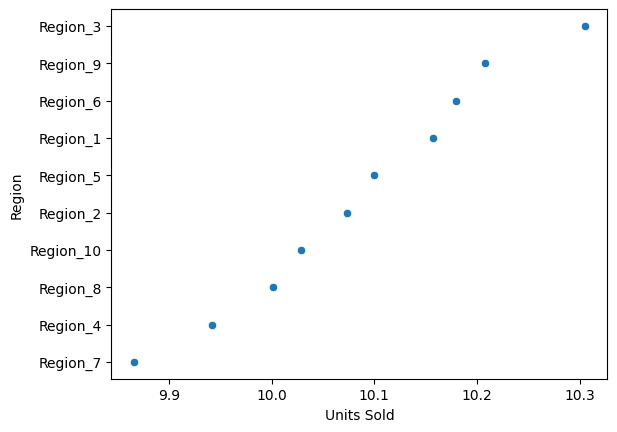

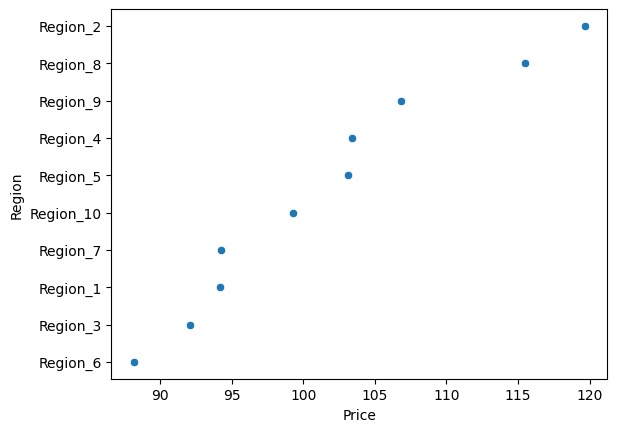

In [165]:
sns.scatterplot(x='Units Sold', y='Region', data=df_Top_Reg)
plt.show()

sns.scatterplot(x='Price', y='Region', data=df_Top_Reg_Price)
plt.show()

In [156]:
df_Top_Prod_Price = df.groupby(['Product'])['Price'].mean().sort_values(ascending=False).reset_index()

In [160]:
df_Top_Prod_Price.head()

,Product,Price
0,Product_49,155.974167
1,Product_40,142.865556
2,Product_29,138.275268
3,Product_20,131.640793
4,Product_14,130.131915


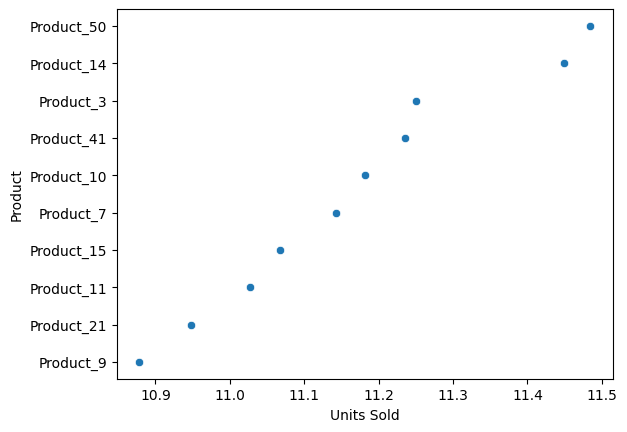

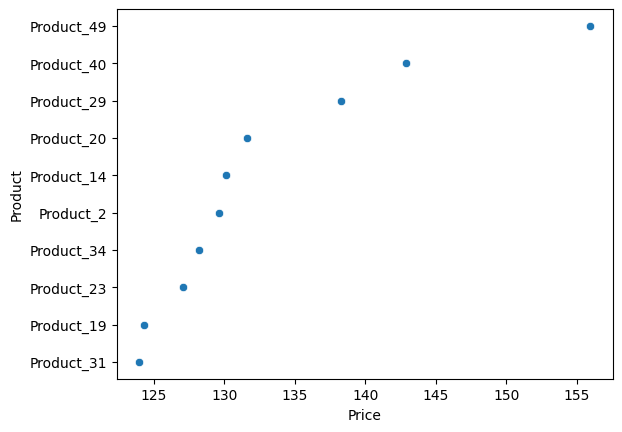

In [166]:
sns.scatterplot(x='Units Sold', y='Product', data=df_Top_Prod.head(10))
plt.show()

sns.scatterplot(x='Price', y='Product', data=df_Top_Prod_Price.head(10))
plt.show()

Based on my analysis, in Region 8, 4 and 7, more effort should be targeted at promoting product 50, 14 and 3 as they are the most ordered products and advertizing can work to bring awareness in those regions of low sales. Prices for products 49, 40 and 29 can also be reduced slightly to increase sales of those products. The price skiming strategy can be adopted to achieve this.


To clean this data, I removed all null values for product and region because replacing them with a predictive value would be far of a stretch. I then created a box plot to identify and remove extremely high prices. Lastly, I filled the null values for price and units with the mean grouping by region.